<a href="https://colab.research.google.com/github/Yumpop/colab_test/blob/main/%EB%8B%A4%EC%96%91%ED%95%9C_%EB%B6%84%EB%A5%98_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다양한 로지스틱 회귀

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head() # 처음 5개의 행을 출력

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


- unique() : 원하는 열에서 고유한 값을 추출
- 위 데이터프레임에서는 species열은 타깃으로 하고 남은 열을 입력데이터로 사용


In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height','Width']].to_numpy()

In [ ]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)  # 훈련세트의 통계값으로 테스트세트를 변환하는것 잊지 않기!!!
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### K - 최근접 이웃 분류기의 확률 예측


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


- 타깃데이터에 2개 이상의 클래스가 있으면 ***다중분류*** 라고 한다.
- 앞에서 타깃데이터를 (0,1)로 나눈것은 이진분류다. 
- 다중분류에서도 타깃값을 숫자로 표현 가능하지만 사이킷런에서는 문자열로 된 타깃값 사용 가능
- 주의할 점) 타깃값을 사이킷런 모델에 전달하면 순서가 자동으로 알파벳순서로 바뀜
    - 타깃데이터들은 classes_ 속성에 들어가 있음

In [ ]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


- predict_proba() 에서드의 출력순서는 classes_속성과 같다. 
- 즉, 첫번째 열이 Bream의 확률, 두번째 열이 Parkki의 확률이다.

In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals =4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distance, index = kn.kneighbors(test_scaled[3:4])
print(train_target[index])

[['Roach' 'Perch' 'Perch']]


### 로지스틱 회귀
- 이름은 회귀이지만 분류모델
- 로지스틱 회귀는 선형회귀와 동일하게 선형방정식을 학습
- z = a X (Weight) + b X (Length) + c X (Diagonal) + d X (Height) + e X (Width) + f
- 여기에서 a,b,c,d,e는 가중치 혹은 계수이다. 
- z는 어떤 값도 가능하지만 확률이 되려면 0~1 사이 값이 되야 한다. 
    - 아주 큰 음수일 때는 0이 되고 아주 큰 양수일 때는 1이 되도록 바꾼 함수 - 시그모이드 함수
        - 시그모이드 함수 = <img src="https://cdn-images-1.medium.com/max/1200/1*Vo7UFksa_8Ne5HcfEzHNWQ.png" width="200" height="80">
        - 지수함수 계산은 np.exp()함수 사용



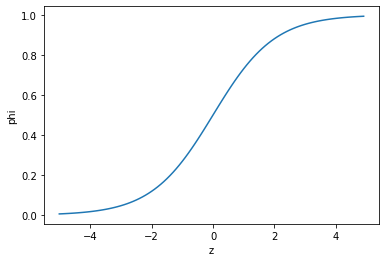

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1/(1 + np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

- 넘파이 배열은 True, False값을 전달하여 행을 선택 가능
- 이를 ***불리언 인덱싱*** 이라고 함

In [ ]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


- 도미(bream)와 빙어(Smelt)의 행만 골라내기

In [ ]:
bream_smelt_index = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_index]
target_bream_smelt = train_target[bream_smelt_index]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


- predict_proba() : 예측확률을 출력

In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


- Bream과 Smelt중 누가 양성 클래스인가
- 타깃값이 알파벳순이기 때문에 빙어(Smelt)가 양성 클래스이다.

In [ ]:
print(lr.classes_)

['Bream' 'Smelt']


- 가중치와 절편 확인하기

In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


 - train_bream_smelt의 처음 5개 샘플의 z값을 확인

In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


- 이 z값들을 시그모이드 함수에 통과시키면 확룰을 얻을 수 있다.
- 파이썬의 사이파이(scipy)라이브러리에도 시그모이드 함수 expit() 가 있다.  

In [ ]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀로 다중분류 수행

- LogisticRegression 클래스는 기본적으로 반복적인 알조리즘을 사용
    - max_iter 매개변수에서 반복횟수를 지정하며 기본값은 100
- LogisticRegression 클래스는 기본적으로 릿지회귀와 같이 계수의 제곱을 이용해 규제함
- 릿지회귀는 alpha로 로지스틱회귀는 C 이다
- 매개변수 C의 기본값은 1 이고 alpha와 달리 값이 작을수록 규제가 커

In [ ]:
lr = LogisticRegression(C=20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


- 타깃 클래스 정보 확인

In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


- coef_ 와 intercept_ 의 행의 개수가 7개 = 다중분류는 클래스마다 z값을 하나씩 계산 => 가장 높은 z값의 클래스가 예측 클래스

- 확률을 계산하기
    - 이진분류에서는 시그모이드 함수를 사용
    - 다중분류는 소프트맥스(softmax)함수를 사용
- 7개의 z값을 z1 ~ z7로 가정
e_sum = e<sup>z1</sup> + e<sup>z2</sup> + e<sup>z3</sup> + e<sup>z4</sup> + e<sup>z5</sup> + e<sup>z6</sup> + e<sup>z7</sup>
- 그 다음 e<sup>z1</sup> ~ e<sup>z7</sup> 까지 e_sum으로 나누면 됨
- 그럼 각각의 값이 확률


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax
proba = softmax(decision, axis =1)
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 확률적 경사 하강법

 점진적 학습 : 전에 훈련된 모델을 버리지 않고, 앞으로 추가될 데이터들을 조금식 더 훈련하는 방법
- 점진적 학습의 대표적인 알고리즘이 ***확률적 경사 하강법***이다
    - 경사 하강이란 이미지는  산길을 내려갈 때 가장 빠른 길은 경사가 가장 가파른 길이다
        - 확률적 경사 하강법에서 훈련세트를 한번 모두 사용하는 과정을 ***에포크***라고 한다.
            - 일반적으로 경사하강법은 수십, 수백번 수행한다. 
        - 확률이란 랜덤하게 train_input데이터에서 데이터를 하나씩 뽑는 것이다. 
            - 하나의 데이터씩 말고 무작위의 몇개의 샘플을 사용해서 경사를 따라내려가는 경사하강법을 ***미니배치 경사 하강법*** 이라고 한다
            - 극단적으로 한번 경사로를 따라 내려가기 위해 전체 샘플을 사용하는 방법을 ***배치경사 하강법***이라고 한다.
    - 여기서 내려오는 산은 ***손실함수***라 부르는 산이다
        - 손실함수는 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준
        - 손실함수의 값이 작을수록 좋지만, 어떤 값이 최솟값인지 모른다.
            -  그래서 가능한 많이 찾아보고 만족할만한 수준이면 산을 내려왔다고 인정해야 함
        - 산의 경사면은 연속적이므로 손실함수도 연속적, 즉 미분가능해야 한다



### 로지스틱 손실 함수


- 예측확률을 0.9, 0.3, 0.2, 0.8로 가정해보기
- 

### SGDClassifier


In [20]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [21]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [22]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

- SGDClassifier 의 객체를 만들 때 2개의 매개변수를 지정한다 .
    - loss는 손실함수의 종류를 지정
        - 여기에선 loss = 'log'로 지정하여 로지스틱 손실함수를 지정
    - max_iter은 수행할 에보크 횟수를 지정

In [24]:
from sklearn.linear_model import SGDClassifier

In [35]:
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.8


- 정확도가 낮다. 지정한 반복횟수 10번이 부족하다.
- partial_fit()메서드는 fit메서드와 사용법이 같지만 호출할 때마다 1 에보크씩 이어서 훈련가능

In [27]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7815126050420168
0.8


### 에보크의 과대/ 과소적합

- 에보크 횟수가 적으면 모델이 훈련을 덜 학습해서 과소적합이 발생
- 에보코 횟수가 많으면 과대적합이 발생
- 과소적합에서 과대적합으로 진행될 때 과대적합이 시작하기 전 훈련을 멈추는 것을 ***조기종료*** 라고 한다 
- unique() 함수로 train_target안에 있는 7개의 생선목록 생성
- 각 에보크마다 훈련세트와 테스트세트의 대한 점수 기록

In [36]:
import numpy as np
sc = SGDClassifier(loss='log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [38]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

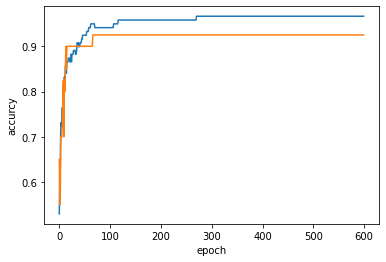

In [40]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accurcy')
plt.show()

- 100번째 에보크 이후 과대적합이 되어가고 있다. 
- tol 매개변수는 반복을 멈출 조건이다, 기본값은 5다

In [43]:
sc = SGDClassifier(loss = 'log', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


- loss의 매개변수는 원래 hinge이다. 
- 힌지손실은 서포트 벡터 머신이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실함수
- SGDClassifier 라이브러리가 여러가지 손실함수를 loss 매개변수에 지정하여 다양한 머신러닝 알고리즘을 지원함

In [44]:
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
